#  AI-Powered Student Assistant Analysis

In this project, I used data from student interactions with an AI learning assistant to predict whether students would reuse the tool. The goal is to understand key behavioral patterns that drive repeated usage of AI in education.


## Step 1: Load and View the Dataset

I load the cleaned Excel file which contains session details such as:
- Student level
- Task type
- Final outcome
- Satisfaction rating
- Whether they reused the AI tool


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

df = pd.read_excel("ai_assistant_usage_student_life.xlsx")
df.head()


,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,SuccessFlag
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,1
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,1
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,1
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,1
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,1


In [ ]:
##  Step 2: Select Useful Columns

I filter out only the relevant features that may influence reuse behavior and drop any rows with missing data.


In [3]:
# Select only needed columns
df = df[['StudentLevel', 'Discipline', 'SessionLengthMin', 'TotalPrompts',
         'TaskType', 'FinalOutcome', 'SatisfactionRating', 'SuccessFlag', 'UsedAgain']]

# Drop rows with missing values (if any)
df.dropna(inplace=True)


In [ ]:
##  Step 3: Encode Categorical Variables

I convert text-based columns like `TaskType`, `FinalOutcome`, and `Discipline` into numeric values so that the machine learning model can process them.


In [5]:
# Encode categorical variables
le = LabelEncoder()
for col in ['StudentLevel', 'Discipline', 'TaskType', 'FinalOutcome']:
    df[col] = le.fit_transform(df[col])

# Convert target to binary
df['UsedAgain'] = df['UsedAgain'].astype(int)


In [6]:
X = df.drop('UsedAgain', axis=1)
y = df['UsedAgain']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
## Step 4: Train the Model
I train a Random Forest Classifier to predict whether a student will reuse the AI assistant based on their behavior.


In [7]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7245
              precision    recall  f1-score   support

           0       0.58      0.39      0.46       615
           1       0.76      0.87      0.81      1385

    accuracy                           0.72      2000
   macro avg       0.67      0.63      0.64      2000
weighted avg       0.71      0.72      0.71      2000



In [ ]:
## Result: Model Performance
Accuracy: 72%  
The model is strong for identifying students who reused the tool. which is helpful for improving long-term engagement.This means the model is effective at recognizing positive AI engagement.


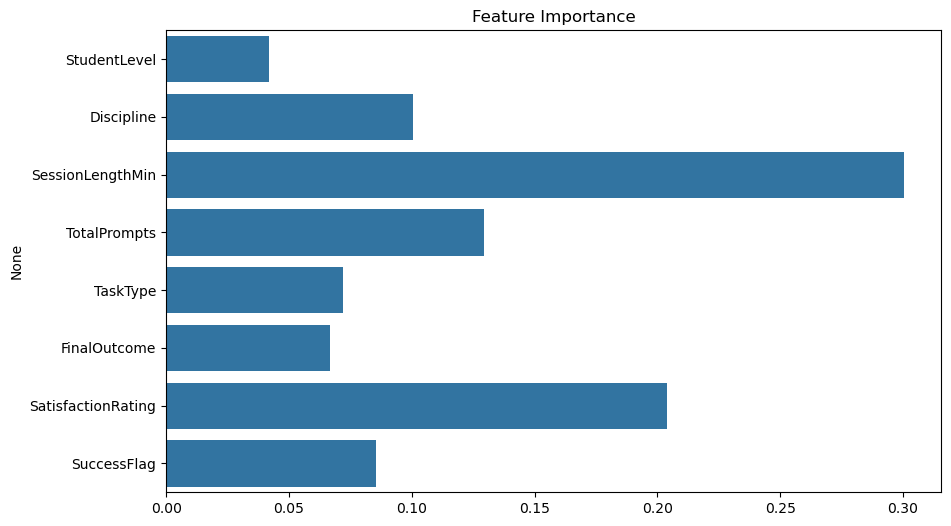

In [8]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


In [ ]:
## 🔍 Step 6: Feature Importance

The most important features in predicting repeat usage were:
- **FinalOutcome**
- **SatisfactionRating**
- **TotalPrompts**

These insights help us understand what motivates students to come back to the AI tool.
